# Create Font Labeler Class

In [55]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

train_images = genfromtxt("data/train_images.csv", delimiter=",")
train_labels = genfromtxt("data/train_labels.csv", delimiter=",")

class MoreAwesomeFontLabeler:
    
    def __init__(self, feature_selector, comparator):
        self.feature_selector = feature_selector
        self.comparator = comparator
        self.features = []
        self.labels = []
    
    def fit(self, images, labels):
        self.labels = labels
        for image in images:
            self.features += [self.feature_selector(image)]
    
    def predict(self, images):
        prediction_labels = []
        for index, image in enumerate(images):
            image_vector = self.feature_selector(image)
            best_fit = np.inf
            best_fit_index = -1
            for feature_index, feature in enumerate(self.features):
                distance = self.comparator(image_vector, feature)
                if distance < best_fit:
                    best_fit = distance
                    best_fit_index = feature_index
            prediction_labels += [self.labels[best_fit_index]]
        return prediction_labels


# Determine selector and comparator methods

In [66]:
def get_features(image):
    reshaped_image = image.reshape((28, 28))
    feature_vector = np.zeros(28)
    for index, pixel in np.ndenumerate(reshaped_image):
        if pixel != 0:
            row = index[0]
            feature_vector[row] += 1
    return feature_vector

def compare(image1_features, image2_features):
    similarity = 0
    for index in range(len(image1_features)):
        similarity += abs(image1_features[index] - image2_features[index])
    return similarity

def draw(images, labels):
    plt.figure(figsize= (15, 4.5))
    for i in range(30):
      plt.subplot(3, 10, i+1)
      plt.imshow(images[i].reshape((28, 28)), cmap=plt.cm.binary)
      plt.axis('off')
      label = int(labels[i])
      plt.title("Label: %d" % label)
    plt.subplots_adjust(wspace=-0.1, hspace=1)
    plt.show()

def calculate_accuracy(expectation, prediction):
    experiments = 0
    successes = 0
    for index in range(len(expectation)):
        experiments += 1
        if expectation[index] == prediction[index]:
            successes += 1
    return successes * 100 / experiments

# Initiate Font Labeler Instance and train it

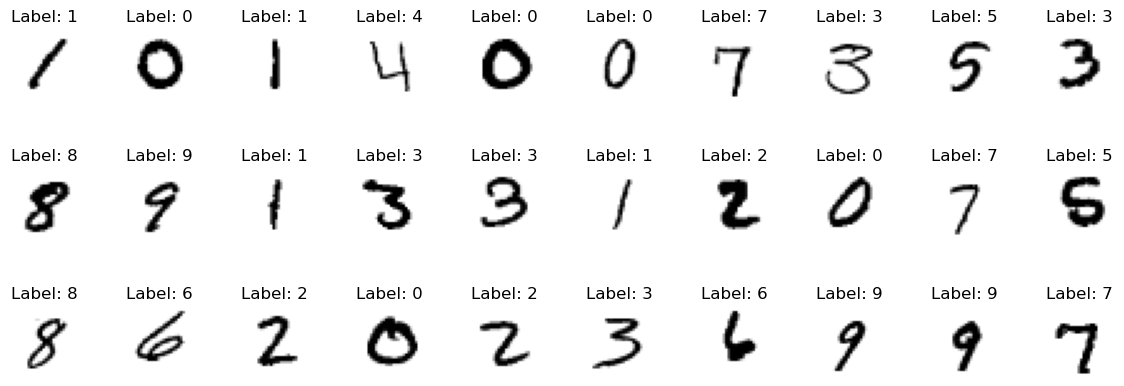

In [67]:
labeler = MoreAwesomeFontLabeler(get_features, compare)

# Start training
labeler.fit(train_images, train_labels)
draw(train_images, train_labels)

# Test with Train Image Set

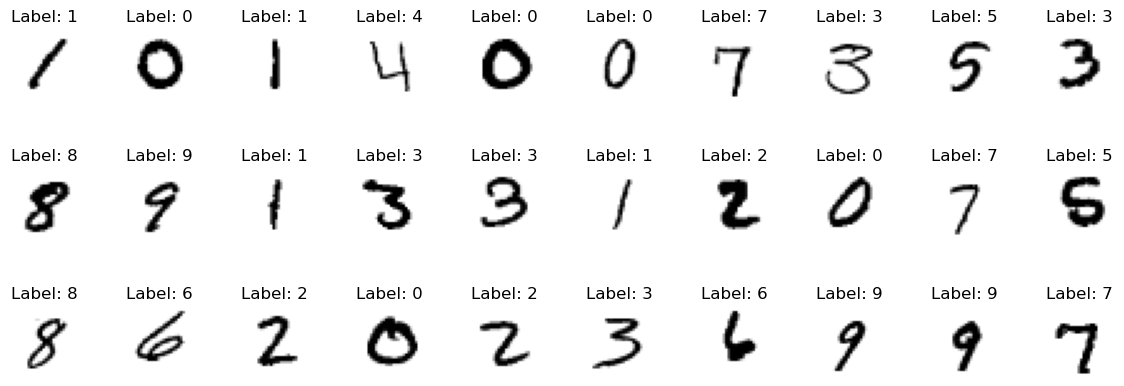

Accuracy 100.0 %


In [68]:
result = labeler.predict(train_images)
draw(train_images, result)
print("Accuracy", round(calculate_accuracy(train_labels, result), 2), "%")

# Test with Test Image Set

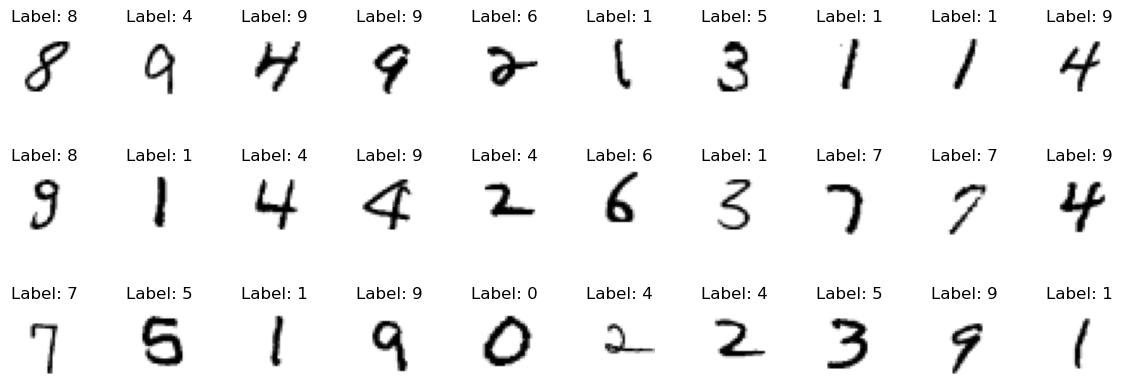

Accuracy 56.67 %


In [69]:
test_images = genfromtxt("data/test_images.csv", delimiter=",")
test_labels = genfromtxt("data/test_labels.csv", delimiter=",")
result = labeler.predict(test_images)
draw(test_images, result)
print("Accuracy", round(calculate_accuracy(test_labels, result), 2), "%")